In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import sys
import pickle as pkl
import pickle
import joblib
import itertools
from math import ceil 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier



In [3]:
# load  preprocessed dataset
data=pd.read_csv("train.csv")

data_new=data.values

X=data_new[:,:-1] #gets elements of array but the last one
Y=data_new[:,-1]

#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.25,random_state=7)

In [5]:
#########For Synthesized Slow httptest attack##############
synth_data=pd.read_csv("ShttpAA1.csv")
#convert data from dataframe to matrix
synth_data_new=synth_data.values

#Split data into training data (X) and target label(Y)
X_test=synth_data_new[:,:-1] #gets elements of array but the last one
Y_test=synth_data_new[:,-1]

In [6]:
#########For Synthesized Slowloris attack##############
synth_data1=pd.read_csv("SlowAAl.csv")
synth_data_new1=synth_data1.values

X_test1=synth_data_new1[:,:-1]
Y_test1=synth_data_new1[:,-1]

In [7]:
#Centering data by mean i.e. subtracting mean from each data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
joblib.dump(scaler, 'ss.pkl')
x_test=scaler.transform(x_test)
X_test=scaler.transform(X_test)
X_test1=scaler.transform(X_test1)

E:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


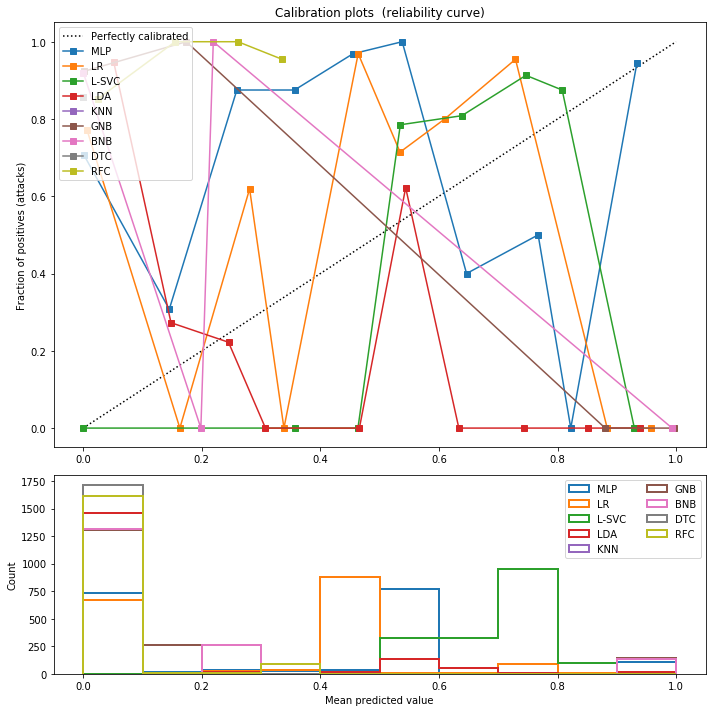

In [8]:
##########For Slowhttptest DoS Attack ###########

# Initialize our classifiers
mlp = MLPClassifier(solver='sgd')
knn = KNeighborsClassifier(n_neighbors=1)
bnb = BernoulliNB()
gnb = GaussianNB()
lr  = LogisticRegression(solver='newton-cg',class_weight='balanced',C=1.0)
lsvc = LinearSVC(class_weight='balanced',multi_class='crammer_singer')
lda = LinearDiscriminantAnalysis()
dtc= DecisionTreeClassifier(class_weight='balanced')
rfc= RandomForestClassifier(class_weight='balanced',n_estimators=200)

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(mlp, 'MLP'),
                  (lr, 'LR'),
                  (lsvc, 'L-SVC'),
                  (lda, 'LDA'),
                  (knn, 'KNN'),
                  (gnb, 'GNB'),
                  (bnb, 'BNB'),
                  (dtc, 'DTC'),
                  (rfc, 'RFC')]:
    clf.fit(x_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(Y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives (attacks)")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="upper left")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper right", ncol=2)

plt.tight_layout()
plt.show()

E:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


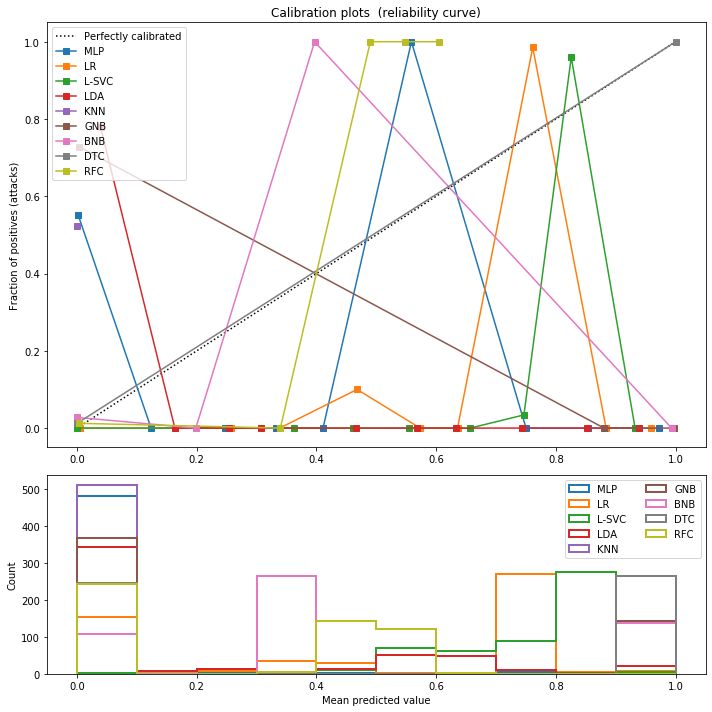

In [10]:
##########For Slowloris DoS Attack ###########


# Initialize our classifiers
mlp = MLPClassifier(solver='sgd')
knn = KNeighborsClassifier(n_neighbors=1)
bnb = BernoulliNB()
gnb = GaussianNB()
lr  = LogisticRegression(solver='newton-cg',class_weight='balanced',C=1.0)
lsvc = LinearSVC(class_weight='balanced',multi_class='crammer_singer')
lda = LinearDiscriminantAnalysis()
dtc= DecisionTreeClassifier(class_weight='balanced')
rfc= RandomForestClassifier(class_weight='balanced',n_estimators=200)

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(mlp, 'MLP'),
                  (lr, 'LR'),
                  (lsvc, 'L-SVC'),
                  (lda, 'LDA'),
                  (knn, 'KNN'),
                  (gnb, 'GNB'),
                  (bnb, 'BNB'),
                  (dtc, 'DTC'),
                  (rfc, 'RFC')]:
    clf.fit(x_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test1)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test1)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(Y_test1, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives (attacks)")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="upper left")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper right", ncol=2)

plt.tight_layout()
plt.show()

In [ ]:
#References:scikit-learn calibration plots